Pertanyaan yang akan di jawab

1. Bagaimana persebaran jenis layanan yang di tawarkan oleh StatsMe kepada client? Manakah layanan yang paling banyak dan yang paling sedikit?
2. Bagaimana persebaran project StatsMe menurut kotanya? 
3. Bagaimana persebaran project StatsMe menurut Instansinya?
4. Bagaimana persebaran project StatsMe menurut Kantor pengerjaannya?
5. Rasio Jumlah Karyawan dengan Jumlah Proyek yang dikerjakan


# Import Library yang digunakan

In [30]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import plotly.express as px

# Exploratory Data Analysis

Load Data

In [32]:
df = pd.read_excel('data.xlsx')
df.head(10)

,No.,Tahun,Kabupaten/Kota,Proyek,Dinas/Instansi,Jenis Layanan,Jenis Instansi,Kantor
0,1,2017,KABUPATEN SUMENEP,Kajian Standard Harga Pakaian Dinas Pimpinan d...,Lain-lain,Kajian,Lain-lain,Kantor Pusat
1,2,2017,KOTA SURABAYA,Survei Pemukiman Padat,Lain-lain,Survei dan Pendataan,Lain-lain,Kantor Pusat
2,3,2017,KOTA SURABAYA,Survei dan Kajian Kepadatan Kendaraan PT. SIER,PT. SIER,Survei dan Pendataan,Swasta,Kantor Pusat
3,4,2017,KABUPATEN BOJONEGORO,Survei Elektabilitas & Popularitas,Lain-lain,Survei dan Pendataan,Lain-lain,Kantor Pusat
4,5,2017,KABUPATEN SIDOARJO,Pengklusteran Dana Bergulir,Dinas Koperasi dan Usaha Mikro,Lain-lain,Pemerintahan,Kantor Pusat
5,6,2018,KOTA BLITAR,Penyusunan Updating Data Bidang Sosial Kemasya...,Sekretariat Daerah,Updating Data,Pemerintahan,Kantor Pusat
6,7,2018,KOTA BLITAR,Penyusunan Buku Profil,Dinas Informasi Komunikasi dan Statistika,Buku dan Video Profile,Pemerintahan,Kantor Pusat
7,8,2018,KOTA BLITAR,Data Sektoral dan Statistik Jilid 2,Dinas Informasi Komunikasi dan Statistika,Satu Data Daerah,Pemerintahan,Kantor Pusat
8,9,2018,KOTA BLITAR,Pengumpulan Data Statistik,Dinas Informasi Komunikasi dan Statistika,Satu Data Daerah,Pemerintahan,Kantor Pusat
9,10,2018,KOTA BLITAR,Indeks Gini,Dinas Informasi Komunikasi dan Statistika,Perhitungan Indeks,Pemerintahan,Kantor Pusat


Melihat Informasi dasar dari data

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   No.             590 non-null    int64 
 1   Tahun           590 non-null    int64 
 2   Kabupaten/Kota  590 non-null    object
 3   Proyek          590 non-null    object
 4   Dinas/Instansi  590 non-null    object
 5   Jenis Layanan   590 non-null    object
 6   Jenis Instansi  590 non-null    object
 7   Kantor          590 non-null    object
dtypes: int64(2), object(6)
memory usage: 37.0+ KB


In [34]:
df.describe(include='all')


,No.,Tahun,Kabupaten/Kota,Proyek,Dinas/Instansi,Jenis Layanan,Jenis Instansi,Kantor
count,590.000000,590.000000,590,590,590,590,590,590
unique,NaN,NaN,55,445,136,10,4,4
top,NaN,NaN,KOTA BLITAR,Survei Kepuasan Masyarakat,Badan Perencanaan Pembangunan Daerah,Survei dan Pendataan,Pemerintahan,Kantor Pusat
freq,NaN,NaN,74,52,71,195,564,552
mean,295.500000,2022.184746,NaN,NaN,NaN,NaN,NaN,NaN
std,170.462606,1.811519,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,148.250000,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,295.500000,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,442.750000,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.drop('No.', axis=1, inplace=True)

In [36]:
df['Kantor'] = df['Kantor'].astype('category')
df['Tahun'] = df['Tahun'].astype('category')
df['Jenis Layanan'] = df['Jenis Layanan'].astype('category')

In [37]:
print("Tipe data Kantor:", df['Kantor'].dtype)
print("Tipe data Tahun:", df['Tahun'].dtype)
print("Tipe data Layanan:", df['Jenis Layanan'].dtype)

Tipe data Kantor: category
Tipe data Tahun: category
Tipe data Layanan: category


Cek apakah ada data yang kosong atau duplikat

In [38]:
df.isnull().sum()

Tahun             0
Kabupaten/Kota    0
Proyek            0
Dinas/Instansi    0
Jenis Layanan     0
Jenis Instansi    0
Kantor            0
dtype: int64

In [39]:
duplicated_df = df[df.duplicated(keep='first')]
display(duplicated_df)
print(f"\nTotal data duplikat: {len(duplicated_df)} baris")

,Tahun,Kabupaten/Kota,Proyek,Dinas/Instansi,Jenis Layanan,Jenis Instansi,Kantor
10,2018,KOTA BLITAR,Penyusunan Updating Data Bidang Sosial Kemasya...,Sekretariat Daerah,Updating Data,Pemerintahan,Kantor Pusat
13,2018,KABUPATEN BLITAR,Survei Kepuasan Masyarakat dan Harapan Masyarakat,Sekretariat Daerah,Survei dan Pendataan,Pemerintahan,Kantor Pusat
44,2019,KABUPATEN KEDIRI,Publikasi Data Statistik Daerah,Dinas Komunikasi dan Informatika,Satu Data Daerah,Pemerintahan,Kantor Pusat
99,2020,KABUPATEN PROBOLINGGO,Survei Kepuasan Masyarakat,Dinas Kependudukan dan Pencatatan Sipil,Survei dan Pendataan,Pemerintahan,Kantor Pusat
233,2022,KABUPATEN MOJOKERTO,Penyusunan Metadata dan Standar Data Statistik...,Dinas Komunikasi dan Informatika,Satu Data Daerah,Pemerintahan,Kantor Pusat
256,2022,KABUPATEN PROBOLINGGO,Belanja Jasa Konsultansi Berorientasi Bidang-K...,Dinas Kependudukan dan Pencatatan Sipil,Lain-lain,Pemerintahan,Kantor Pusat
364,2023,KOTA MOJOKERTO,Survei Kepuasan Masyarakat,Dinas Kesehatan Pengendalian Penduduk dan Kelu...,Survei dan Pendataan,Pemerintahan,Kantor Pusat



Total data duplikat: 7 baris


In [40]:
df = df.drop_duplicates()

### Menjawab Pertanyaan Pertama

Bagaimana persebaran jenis layanan yang di tawarkan oleh StatsMe kepada client? Manakah layanan yang paling banyak dan yang paling sedikit?

In [41]:
df['Jenis Layanan'].unique()

['Kajian', 'Survei dan Pendataan', 'Lain-lain', 'Updating Data', 'Buku dan Video Profile', 'Satu Data Daerah', 'Perhitungan Indeks', 'Pembuatan Website dan Aplikasi', 'Penyusunan Dokumen', 'Infografis']
Categories (10, object): ['Buku dan Video Profile', 'Infografis', 'Kajian', 'Lain-lain', ..., 'Perhitungan Indeks', 'Satu Data Daerah', 'Survei dan Pendataan', 'Updating Data']

In [42]:
layanan_counts = df['Jenis Layanan'].value_counts()
print(layanan_counts)

Jenis Layanan
Survei dan Pendataan              192
Kajian                             96
Perhitungan Indeks                 83
Penyusunan Dokumen                 71
Buku dan Video Profile             46
Lain-lain                          39
Satu Data Daerah                   29
Pembuatan Website dan Aplikasi     15
Updating Data                       7
Infografis                          5
Name: count, dtype: int64


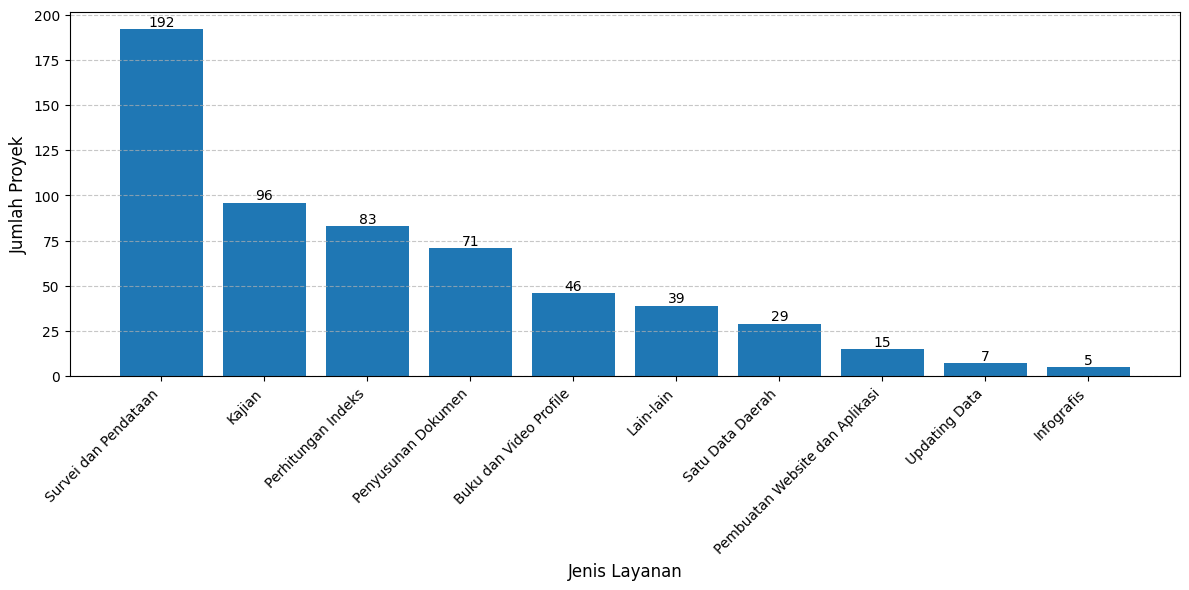

In [43]:
plt.figure(figsize=(12, 6))
bars = plt.bar(layanan_counts.index, layanan_counts.values, width=0.8)
plt.xlabel('Jenis Layanan', size=12)
plt.ylabel('Jumlah Proyek', size=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Interpretasi data :
sejauh ini Survei dan Pendataan menjadi jenis layanan yang paling banyak dilakukan, dengan jumlah proyek sebanyak 192. Hal ini menunjukkan bahwa layanan ini memiliki tingkat permintaan tertinggi dibandingkan layanan lainnya. sedangkan jenis layanan dengan jumlah permintaan paling sedikit adalah infografis dengan 5 permintaan dan disusul updating data dengan 7 permintaan

In [44]:
layanan_percent = (layanan_counts / len(df) * 100).round(1)
layanan_percent

Jenis Layanan
Survei dan Pendataan              32.9
Kajian                            16.5
Perhitungan Indeks                14.2
Penyusunan Dokumen                12.2
Buku dan Video Profile             7.9
Lain-lain                          6.7
Satu Data Daerah                   5.0
Pembuatan Website dan Aplikasi     2.6
Updating Data                      1.2
Infografis                         0.9
Name: count, dtype: float64

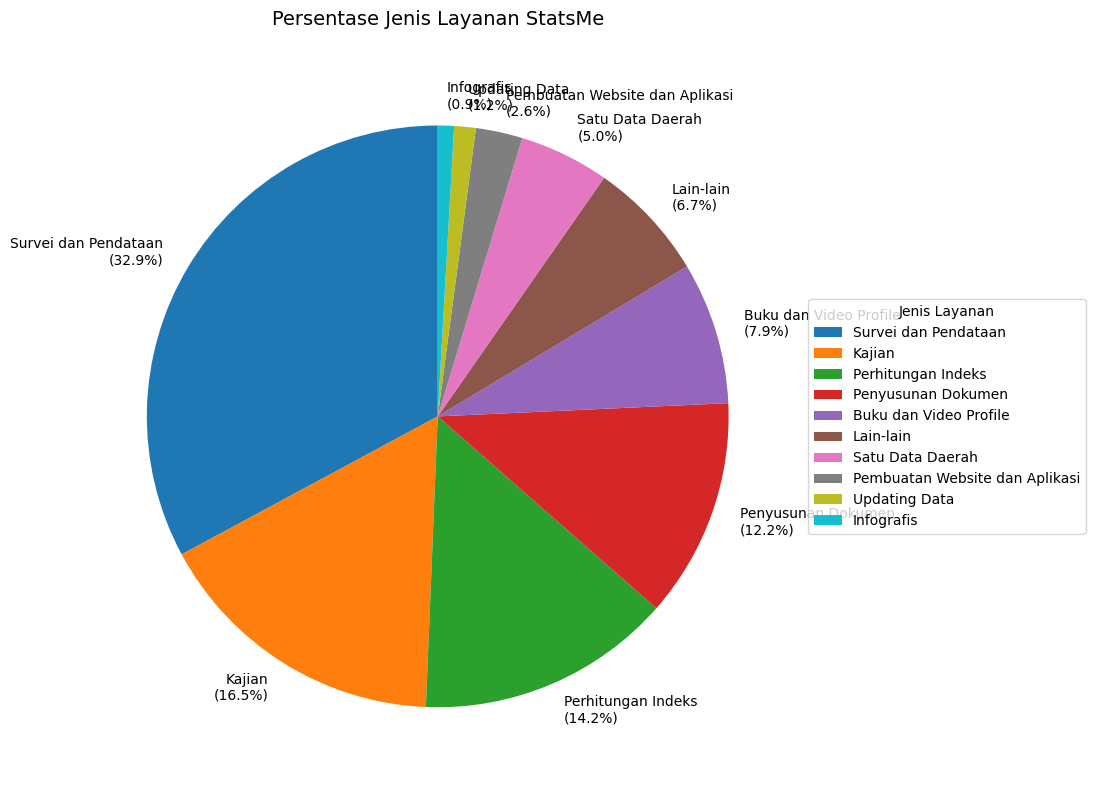

In [45]:
plt.figure(figsize=(12, 8))
plt.pie(layanan_percent, labels=[f'{label}\n({pct}%)' for label, pct in zip(layanan_percent.index, layanan_percent)],
        autopct='', startangle=90)

# Tambahkan judul
plt.title('Persentase Jenis Layanan StatsMe', pad=20, size=14)

# Tambahkan legenda
plt.legend(layanan_percent.index, title="Jenis Layanan", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

Interpretasi data:
Jika dilihat dari persentasenya dapat layanan survei dan pendataan ada diangka 33.1%, ini menunjukkan bahwa sepertiga dari project yang dilaksanakan PT Cemerlang Statistika Indonesia adalah melakukan survei dan pendataan, sedangkan persentase untuk jenis layanan yang lain adalah sebagai berikut : 
Kajian                            16.3%
Perhitungan Indeks                14.1%
Penyusunan Dokumen                12.0%
Buku dan Video Profile             7.8%
Lain-lain                          6.8%
Satu Data Daerah                   5.3%
Pembuatan Website dan Aplikasi     2.5%
Updating Data                      1.4%
Infografis                         0.8%

### Menjawab Pertanyaan Kedua

Bagaimana persebaran project StatsMe menurut kotanya?

In [46]:
df['Kabupaten/Kota'].unique()

array(['KABUPATEN SUMENEP', 'KOTA SURABAYA', 'KABUPATEN BOJONEGORO',
       'KABUPATEN SIDOARJO', 'KOTA BLITAR', 'KABUPATEN BLITAR',
       'KABUPATEN PROBOLINGGO', 'KOTA KEDIRI', 'KOTA MALANG',
       'KABUPATEN NGANJUK', 'KABUPATEN MOJOKERTO', 'KOTA MOJOKERTO',
       'KABUPATEN KEDIRI', 'KOTA MADIUN', 'KABUPATEN PASURUAN',
       'KOTA BATU', 'KABUPATEN TUBAN', 'KOTA PASURUAN',
       'KABUPATEN LAMONGAN', 'KABUPATEN TULUNGAGUNG', 'KABUPATEN SAMPANG',
       'KABUPATEN JOMBANG', 'KABUPATEN BANGKALAN', 'KABUPATEN GRESIK',
       'JAWA TIMUR', 'KABUPATEN MADIUN', 'KABUPATEN MAGETAN',
       'KABUPATEN MALANG', 'KABUPATEN PAMEKASAN', 'KOTA PROBOLINGGO',
       'KOTA SURAKARTA', 'KABUPATEN TRENGGALEK', 'KABUPATEN BONDOWOSO',
       'KABUPATEN LUMAJANG', 'KOTA MAKASSAR', 'KABUPATEN PANGANDARAN',
       'SULAWESI SELATAN', 'KOTA TANGERANG', 'KABUPATEN SITUBONDO',
       'KOTA JAKARTA SELATAN', 'KOTA SAMARINDA', 'KOTA PADANG',
       'KALIMANTAN TIMUR', 'KOTA JAKARTA PUSAT', 'KABUPATEN PAT

In [47]:
df['Kabupaten/Kota'].value_counts()

Kabupaten/Kota
KOTA BLITAR               73
KABUPATEN MOJOKERTO       62
KABUPATEN BOJONEGORO      43
KABUPATEN SIDOARJO        38
KOTA MOJOKERTO            33
KABUPATEN BLITAR          32
KABUPATEN PROBOLINGGO     26
KABUPATEN LAMONGAN        25
KABUPATEN NGANJUK         20
KOTA MALANG               19
KABUPATEN SUMENEP         15
KABUPATEN JOMBANG         15
KABUPATEN TULUNGAGUNG     15
KOTA MADIUN               15
KABUPATEN PASURUAN        10
KABUPATEN TRENGGALEK      10
KABUPATEN MADIUN          10
KABUPATEN SITUBONDO        8
KABUPATEN PAMEKASAN        8
KOTA KEDIRI                7
KOTA SURAKARTA             7
KOTA BATU                  6
KABUPATEN BEKASI           6
KOTA PASURUAN              6
KOTA SURABAYA              6
KABUPATEN KEDIRI           6
KOTA MAKASSAR              6
KABUPATEN MALANG           5
JAWA TIMUR                 5
KABUPATEN TUBAN            5
KOTA SAMARINDA             4
KABUPATEN BLORA            3
KABUPATEN SAMPANG          3
SULAWESI SELATAN           3

Interpretasi data :
Proyek yang dikerjakan PT Cemerlang Statistika masih terpusat di Pulau Jawa, khususnya ada di Provinsi Jawa Timur. Hal ini wajar karena provinsi ini menjadi awal berdirinya perusahaan.
Jika dilihat berdasarkan kotanya, jumlah proyek paling banyak di kerjakan adalah di Kota Blitar dengan total 73 proyek disusul dengan Kabupaten Mojokerto dengan total 62 proyek dan Kabupaten Bojonegoro dengan 43 proyek

### Menjawab Pertanyaan ketiga

Bagaimana persebaran project StatsMe menurut Instansinya?

In [48]:
df['Dinas/Instansi'].unique()

array(['Lain-lain', 'PT. SIER', 'Dinas Koperasi dan Usaha Mikro',
       'Sekretariat Daerah', 'Dinas Informasi Komunikasi dan Statistika',
       'Dinas Komunikasi dan Informatika',
       'Dinas Perindustrian dan Perdagangan',
       'Badan Perencanaan Pembangunan Penelitian dan Pengembangan',
       'Dinas Penanaman Modal dan Perizinan Terpadu Satu Pintu',
       'Dinas Perijinan dan Penanaman Modal', 'Dinas Kesehatan',
       'Dinas Koperasi Usaha Mikro dan Tenaga Kerja',
       'RSU Dr. Wahidin Sudiro Husodo',
       'Dinas Pengendalian Penduduk Keluarga Berencana Pemberdayaan Perempuan Perlindungan Anak',
       'Badan Perencanaan dan Pembangunan Daerah',
       'Dinas Komunikasi Informatika dan Statistik',
       'Dinas Perpustakaan dan Kearsipan', 'Dinas Pendidikan',
       'Dinas Kependudukan dan Catatan Sipil',
       'Dinas Pariwisata dan Kebudayaan', 'Dinas Tenaga Kerja',
       'Dinas Pertanian', 'Badan Perencanaan Pembangunan Daerah',
       'RSUD Wahidin', 'DP2KB', 'Dina

In [49]:
df['Dinas/Instansi'].value_counts()

Dinas/Instansi
Badan Perencanaan Pembangunan Daerah                                                           71
Dinas Komunikasi dan Informatika                                                               55
Dinas Perindustrian dan Perdagangan                                                            30
Dinas Kependudukan dan Pencatatan Sipil                                                        25
Sekretariat Daerah                                                                             20
                                                                                               ..
Dinas Perumahan Rakyat Kawasan Pemukiman dan Pertanahan                                         1
Dinas Kesehatan dan Pengendalian Penduduk Keluarga Berencana                                    1
Dinas Pengendalian Penduduk Keluarga Berencana Pemberdayaan Perempuan dan Perlindungan Anak     1
Dinas Ketahanan Pangan dan Peternakan                                                           1
RSUD 

In [50]:
df['Jenis Instansi'].value_counts()

Jenis Instansi
Pemerintahan    557
Rumah Sakit      18
Swasta            5
Lain-lain         3
Name: count, dtype: int64

In [51]:
instansi_counts = df['Jenis Instansi'].value_counts()
instansi_percent = (instansi_counts / len(df) * 100).round(1)

In [52]:
# Buat visualisasi pie chart menggunakan plotly
fig_pie = px.pie(
    values=instansi_percent.values,
    names=instansi_percent.index,
    title='Persentase Proyek Berdasarkan Jenis Instansi',
    height=500,
    color_discrete_sequence=['#00B4D8', '#90E0EF', '#CAF0F8', '#48CAE4']
)

# Kustomisasi tampilan
fig_pie.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hole=0.4,
    pull=[0.1 if i == 0 else 0 for i in range(len(instansi_percent))]
)

# Tampilkan chart
fig_pie.show()

# Tampilkan persentase dalam bentuk teks
print("\nPersentase per Jenis Instansi:")
for instansi, persen in instansi_percent.items():
    print(f"{instansi}: {persen}%")


Persentase per Jenis Instansi:
Pemerintahan: 95.5%
Rumah Sakit: 3.1%
Swasta: 0.9%
Lain-lain: 0.5%


Interpretasi data :
Proyek yang dikerjakan PT Cemerlang Statistika lebih dominan berada pada sektor pemerintahan, terbukti bahwa 95.5% proyek yang dikerjakan ada di Instansi Pemerintahan dengan total 557 proyek, disusul dangan Rumah Sakit dengan 18 Proyek (3.1%), Instansi Swasta 5 proyek (0.9%) dan Instansi Lain 3 Proyek (0.5%). 

### Menjawab Pertanyaan Ke empat

Bagaimana persebaran project StatsMe menurut Kantor Pengerjaanya?

In [53]:
df['Kantor'].value_counts()

Kantor
Kantor Pusat        545
Jawa Tengah          17
Jawa Barat           11
Sulawesi Selatan     10
Name: count, dtype: int64

In [54]:
kantor_counts = df['Kantor'].value_counts()
kantor_percent = (kantor_counts / len(df) * 100).round(1)

In [55]:
fig_pie = px.pie(
    values=kantor_percent.values, 
    names=kantor_percent.index,
    title='Persentase Proyek Berdasarkan Kantor',
    height=400,
    color_discrete_sequence=['#00B4D8', '#90E0EF', '#CAF0F8', '#48CAE4'])

fig_pie.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hole=0.4,
    pull=[0.1 if i == 0 else 0 for i in range(len(kantor_percent))])

fig_pie.show()

Interpretasi data :
Kantor Jawa Timur sejauh ini melaksanakan proyek paling banyak dengan total 545 proyek atau 93.5% dari keseluruhan proyek, hal ini terjadi karena Kantor Jawa Timur berdiri lebih awal dari kantor cabang yang lain, melalui grafik ini juga menambah penguatan bahwa proyek yang dikerjakan PT Cemerlang Statistika masih terpusat dipulau jawa, khususnya ada di Provinsi Jawa Timur. Namun perlahan dalam kantor cabang lain yang juga sudah banyak menerima proyek diantaranya : Kantor Cabang Jawa Tengah dengan 17 Proyek (2.9%), Kantor Cabang Jawa Barat dengan 11 Proyek (1.8%) dan Kantor Cabang Sulawesi Selatan dengan 10 Proyek (1.7%). 

### Menjawab Pertanyaan Kelima

Rasio Jumlah Karyawan dengan Jumlah Proyek yang dikerjakan

In [56]:
df_karyawan = pd.read_excel('Jumlah Karyawan STATSME.xlsx')

In [57]:
fig_line = px.line(df_karyawan, 
                  x='Tahun', 
                  y=['Jumlah Karyawan', 'Total Proyek'],
                  height=400)

fig_line.update_traces(
    line=dict(width=3),
    selector=dict(name='Jumlah Karyawan'),
    line_color='#00B4D8'
)
fig_line.update_traces(
    line=dict(width=3),
    selector=dict(name='Total Proyek'),
    line_color='#FF6B6B'
)

fig_line.update_layout(
    xaxis_title="Tahun",
    yaxis_title="Jumlah",
)

Interpretasi data:
Jumlah proyek masuk paling banyak ada di tahun 2024 dengan total 190 proyek di 4 kantor cabang dan pada tahun yang sama jumlah karyawan statsme adalah 39 karyawan. Jika dilihat secara historis tahun 2017 PT Cemerlang Statistika hanya memiliki 3 karyawan dengan total proyek yang dikerjakan adalah 5 proyek. Lalu pada tahun selanjutnya ada 24 proyek yang dikerjakan dengan jumlah karyawan sebanyak 5 karyawan. Jumlah proyek sempat turun, dimana yang awalnya ada 67 proyek pada tahun 2020 turun menjadi 42 proyek pada tahun 2021, meskipun demikian pada tahun-tahun selanjutnya jumlah proyek yang masuk per tahun semakin bertambah dan sejalan dengan pertambahan proyek yang semakin banyak, PT Cemerlang Statistika juga menambah jumlah karyawan-nya sesuai kebutuhan.

In [58]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.11.9.final.0
python-bits           : 64
OS                    : Windows
OS-release            : 10
Version               : 10.0.26100
machine               : AMD64
processor             : AMD64 Family 25 Model 68 Stepping 1, AuthenticAMD
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : English_United States.1252

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2024.1
dateutil              : 2.9.0.post0
setuptools            : 65.5.0
pip                   : 24.3.1
Cython                : None
pytest                : None
hypothesis            : None
sphinx                : None
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.3.0
html5lib              : None
pymysql               : None
psycopg2  